In [39]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

import mitosheet

In [41]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

### Unstructured Variance, n_input = 15, n_output = 1

In [42]:
df = pd.read_excel("Data/US15I1O.xlsx", index_col = 0)
df

,Input 01,Input 02,Input 03,Input 04,Input 05,Input 06,Input 07,Input 08,Input 09,Input 10,Input 11,Input 12,Input 13,Input 14,Input 15,Output 01
DMU 0001,275.46,50.34,340.07,198.33,252.31,152.33,171.94,351.93,99.92,276.03,521.97,377.73,182.73,323.82,149.79,604.61
DMU 0002,215.47,60.38,340.06,310.86,293.92,194.99,213.47,449.00,236.11,219.68,448.57,389.20,136.40,381.47,155.19,549.84
DMU 0003,300.23,64.11,340.12,309.33,318.17,150.53,158.62,260.07,220.55,198.77,347.80,180.49,143.57,314.84,152.35,374.89
DMU 0004,318.80,70.69,340.03,308.70,284.31,177.03,184.56,248.79,196.65,194.76,308.82,370.43,154.72,236.00,150.82,308.83
DMU 0005,308.48,76.50,340.03,300.18,320.88,186.92,207.32,311.17,217.06,213.73,369.79,371.99,140.98,334.56,153.16,478.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,229.84,62.77,340.10,307.80,251.16,170.90,181.09,345.93,209.08,206.03,420.21,324.91,145.44,267.75,152.00,434.69
DMU 0997,277.75,63.85,340.07,297.61,292.52,163.04,211.13,295.84,217.56,231.60,454.72,233.57,140.77,400.10,155.33,528.69
DMU 0998,245.12,44.22,340.05,310.36,284.72,157.20,154.61,341.60,168.51,281.86,383.23,351.73,166.37,259.97,151.17,448.42
DMU 0999,229.51,72.14,340.09,313.09,277.03,161.84,177.60,347.74,232.43,226.38,397.84,333.21,132.83,351.30,154.23,483.78


In [43]:
df_sol = pd.read_excel("US15I1O_Solution.xlsx", index_col = 0)
df_sol

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,1.000000,0.000000,0.012013,0.0,0.000548,0.000000,0.000000,0.000000,0.000000,0.002868,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.001654
DMU 0002,0.812848,0.000000,0.004071,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002082,0.000000,0.000000,0.002176,0.000000,0.0,0.001478
DMU 0003,0.807381,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000149,0.000000,0.000000,0.000451,0.002424,0.000000,0.001165,0.0,0.002154
DMU 0004,0.601498,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001481,0.000000,0.000000,0.002045,0.000000,0.000000,0.000000,0.0,0.001948
DMU 0005,0.783913,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000881,0.000000,0.000685,0.001092,0.000473,0.000000,0.000000,0.0,0.001637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.729545,0.000262,0.000000,0.0,0.000000,0.000521,0.000000,0.000000,0.000022,0.000000,0.000081,0.000000,0.001482,0.000000,0.001132,0.0,0.001678
DMU 0997,0.944673,0.000000,0.000000,0.0,0.000000,0.000000,0.001676,0.000000,0.001441,0.000000,0.000062,0.000000,0.001225,0.000000,0.000000,0.0,0.001787
DMU 0998,0.783763,0.000000,0.007942,0.0,0.000000,0.000000,0.000000,0.001201,0.000000,0.000000,0.000000,0.000126,0.000492,0.000000,0.000930,0.0,0.001748
DMU 0999,0.758824,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000475,0.000000,0.000450,0.001066,0.000676,0.000628,0.000000,0.0,0.001569


In [44]:
mitosheet.sheet(df_sol, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-c9c6808a-ff80-4a3d-955b-69924246c836", "code": {"imports…

In [45]:
print((df_sol==0).sum())
print("Total : ", (df_sol==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      777
Weight_Input 02      776
Weight_Input 03      998
Weight_Input 04      888
Weight_Input 05      846
Weight_Input 06      836
Weight_Input 07      896
Weight_Input 08      443
Weight_Input 09      832
Weight_Input 10      596
Weight_Input 11      424
Weight_Input 12      321
Weight_Input 13      880
Weight_Input 14      386
Weight_Input 15      990
Weight_Output 01       0
dtype: int64
Total :  10889


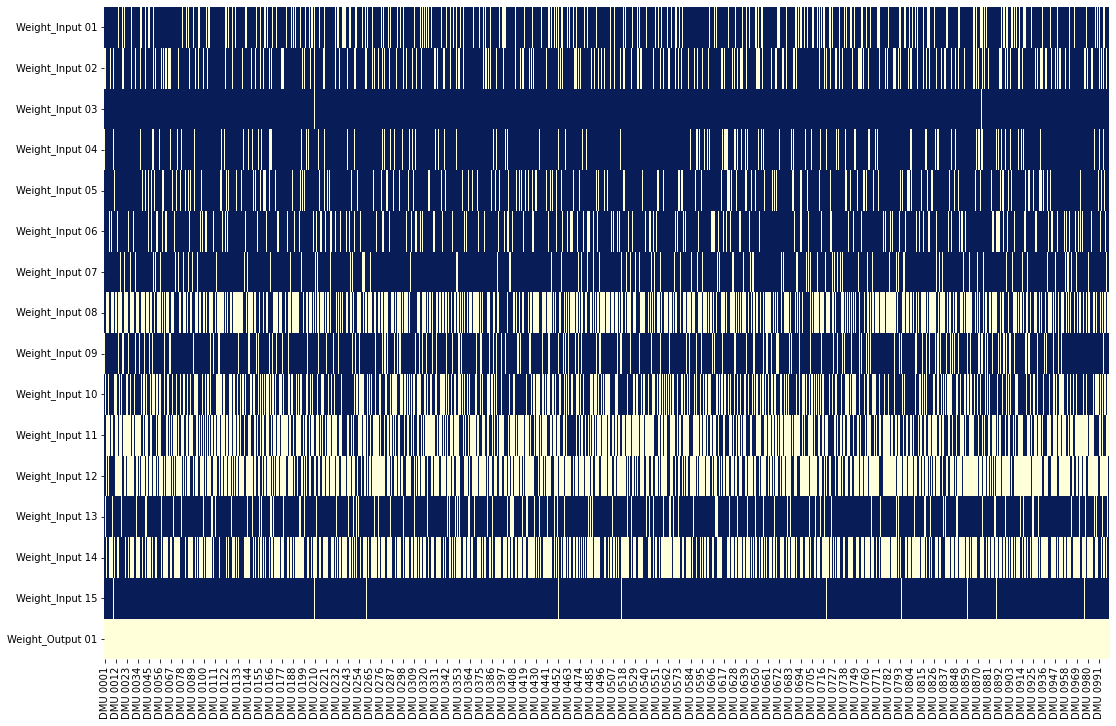

In [46]:
plt.figure(figsize=(18,12))
sns.heatmap(df_sol.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

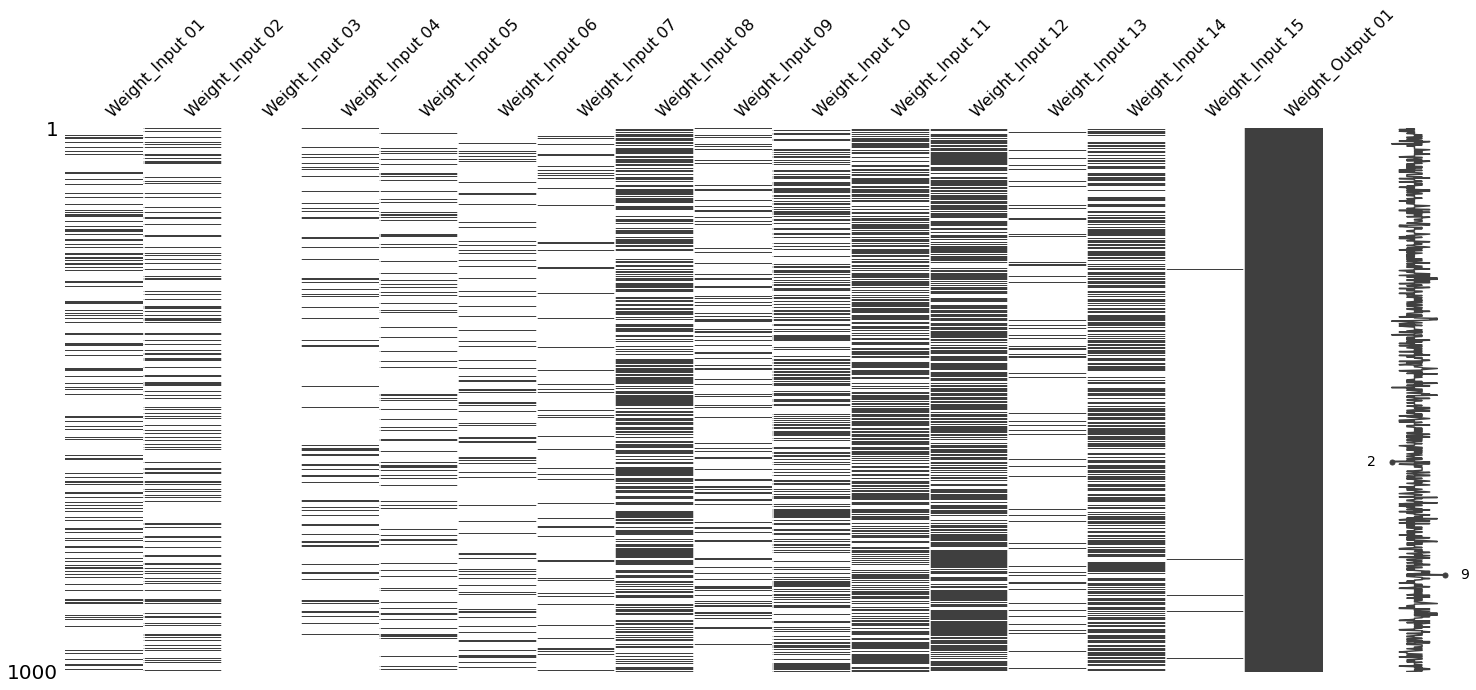

In [47]:
msno.matrix(df_sol.iloc[:,1:].replace(0, np.nan));

In [48]:
df_sol.iloc[:,1:].replace(0, np.nan).isna().sum(axis=1).describe()

count    1000.000000
mean       10.889000
std         1.092645
min         7.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
dtype: float64

### DecisionTreeRegressor

In [49]:
df_dt = pd.read_excel("US15I1O_decisiontreeregressor_Solution.xlsx", index_col=0)
df_dt

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.851557,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.000133,0.000850,0.000133,0.000850,0.000133,0.001408
DMU 0002,0.716795,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000077,0.000395,0.000786,0.000077,0.000786,0.000077,0.001304
DMU 0003,0.711611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000618,0.000000,0.000000,0.000618,0.001261,0.000000,0.001261,0.000000,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000859,0.000859,0.000000,0.000859,0.000000,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000721,0.000000,0.000000,0.000721,0.000721,0.000000,0.000721,0.000000,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.683673,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.000079,0.001285,0.000079,0.001285,0.000079,0.001573
DMU 0997,0.797473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000722,0.000000,0.000000,0.000722,0.000722,0.000000,0.000722,0.000000,0.001508
DMU 0998,0.707104,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000339,0.000050,0.000050,0.000772,0.000772,0.000050,0.000772,0.000050,0.001577
DMU 0999,0.712811,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000317,0.000047,0.000047,0.000721,0.000721,0.000047,0.000721,0.000047,0.001473


In [50]:
print((df_dt==0).sum())
print("Total : ", (df_dt==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      627
Weight_Input 02      596
Weight_Input 03      650
Weight_Input 04      621
Weight_Input 05      533
Weight_Input 06      641
Weight_Input 07      607
Weight_Input 08       32
Weight_Input 09      463
Weight_Input 10      516
Weight_Input 11       26
Weight_Input 12        0
Weight_Input 13      580
Weight_Input 14        0
Weight_Input 15      609
Weight_Output 01       0
dtype: int64
Total :  6501


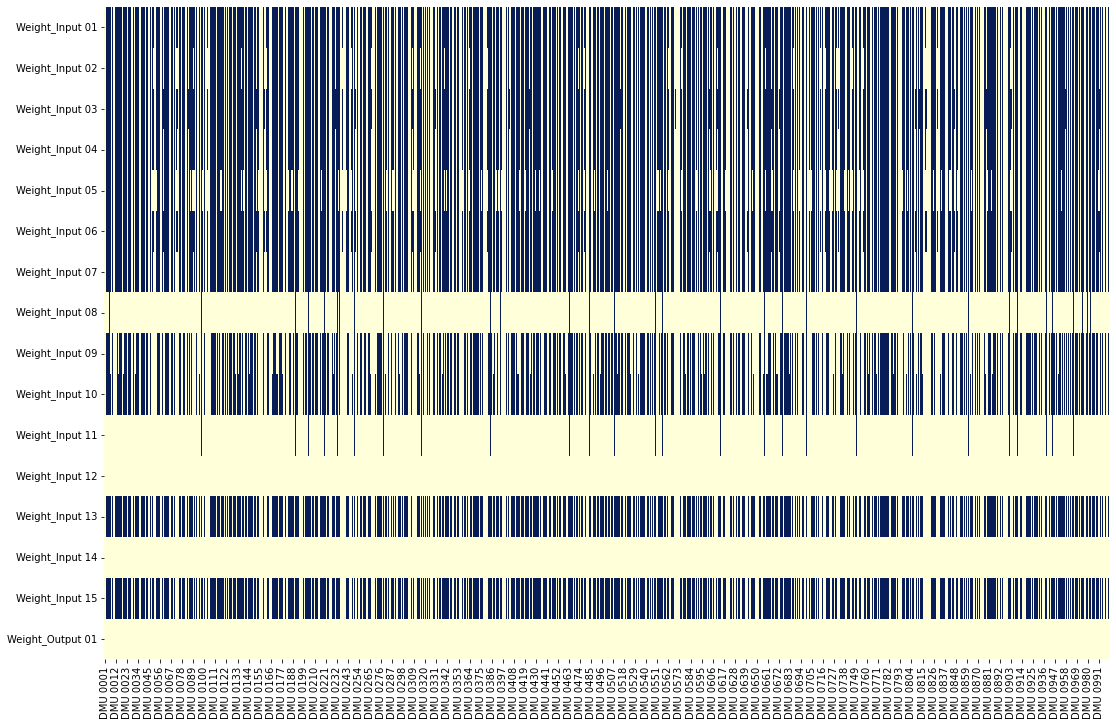

In [51]:
plt.figure(figsize=(18,12))
sns.heatmap(df_dt.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [52]:
res_dt = pd.DataFrame()
res_dt["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_dt["Efficiency_Scores_DT"] = df_dt["Efficiency_Scores"]
res_dt["Diff"] = res_dt["Efficiency_Scores_Basic"]  - res_dt["Efficiency_Scores_DT"]
res_dt["Diff_Perc"] = (res_dt["Diff"] / res_dt["Efficiency_Scores_Basic"]) * 100 
res_dt["Diff_Perc < 10"] = np.abs(res_dt["Diff_Perc"]) < 10  
res_dt = res_dt.round(4)
res_dt


,Efficiency_Scores_Basic,Efficiency_Scores_DT,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,1.0000,0.8516,0.1484,14.8443,False
DMU 0002,0.8128,0.7168,0.0961,11.8169,False
DMU 0003,0.8074,0.7116,0.0958,11.8619,False
DMU 0004,0.6015,0.5540,0.0475,7.9040,True
DMU 0005,0.7839,0.7206,0.0633,8.0743,True
...,...,...,...,...,...
DMU 0996,0.7295,0.6837,0.0459,6.2877,True
DMU 0997,0.9447,0.7975,0.1472,15.5821,False
DMU 0998,0.7838,0.7071,0.0767,9.7809,True
DMU 0999,0.7588,0.7128,0.0460,6.0638,True


In [53]:
mitosheet.sheet(res_dt, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-e4785c77-e993-46f2-a6d6-b15d009b1e6b", "code": {"imports…

In [54]:
blue = res_dt["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_dt["Diff_Perc < 10"]) - (res_dt["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  717
red :  283


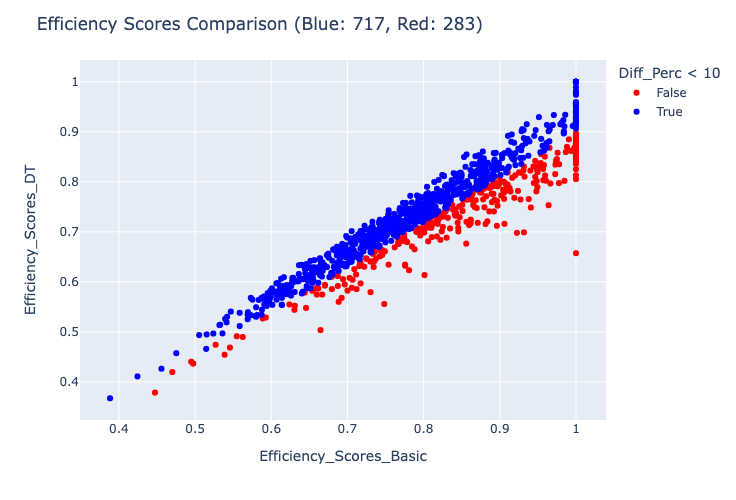

In [55]:
fig = px.scatter(res_dt, x="Efficiency_Scores_Basic", y="Efficiency_Scores_DT", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_DT", "Diff_Perc"] + [res_dt.index])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### RandomForestRegressor

In [56]:
df_rf = pd.read_excel("US15I1O_randomforestregressor_Solution.xlsx", index_col=0)
df_rf

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.846707,0.000000,0.000384,0.000000,0.000384,0.000384,0.000384,0.000000,0.000384,0.000384,0.000384,0.000384,0.000384,0.000000,0.000384,0.000000,0.001400
DMU 0002,0.720842,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000215,0.000044,0.000215,0.000624,0.000624,0.000044,0.000624,0.000044,0.001311
DMU 0003,0.711432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000686,0.000000,0.000000,0.000974,0.000974,0.000000,0.000974,0.000000,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000859,0.000859,0.000000,0.000859,0.000000,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000721,0.000000,0.000000,0.000721,0.000721,0.000000,0.000721,0.000000,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.677334,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,0.000256,0.000052,0.000256,0.000742,0.000742,0.000052,0.000742,0.000052,0.001558
DMU 0997,0.797473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000722,0.000000,0.000000,0.000722,0.000722,0.000000,0.000722,0.000000,0.001508
DMU 0998,0.707440,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000054,0.000347,0.000054,0.000054,0.000771,0.000771,0.000000,0.000771,0.000054,0.001578
DMU 0999,0.712811,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000317,0.000047,0.000047,0.000721,0.000721,0.000047,0.000721,0.000047,0.001473


In [57]:
print((df_rf==0).sum())
print("Total : ", (df_rf==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      636
Weight_Input 02      529
Weight_Input 03      611
Weight_Input 04      606
Weight_Input 05      537
Weight_Input 06      608
Weight_Input 07      625
Weight_Input 08       12
Weight_Input 09      522
Weight_Input 10      388
Weight_Input 11        0
Weight_Input 12        3
Weight_Input 13      785
Weight_Input 14        0
Weight_Input 15      650
Weight_Output 01       0
dtype: int64
Total :  6512


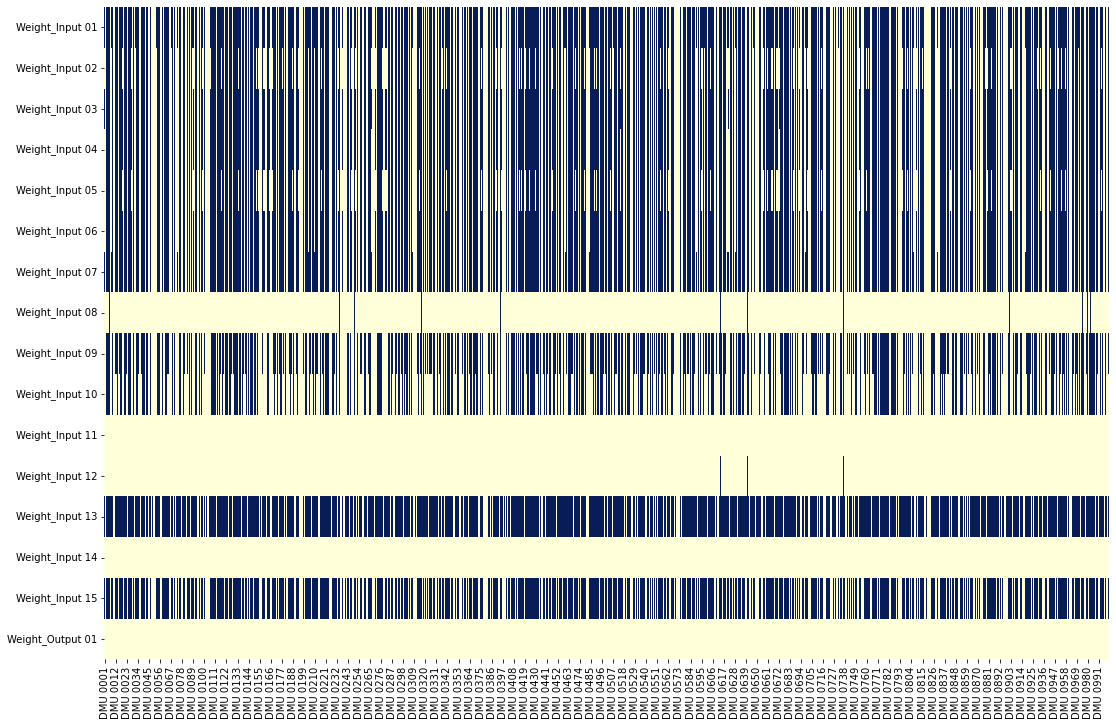

In [58]:
plt.figure(figsize=(18,12))
sns.heatmap(df_rf.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [59]:
res_rf = pd.DataFrame()
res_rf["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_rf["Efficiency_Scores_RF"] = df_rf["Efficiency_Scores"]
res_rf["Diff"] = res_rf["Efficiency_Scores_Basic"]  - res_rf["Efficiency_Scores_RF"]
res_rf["Diff_Perc"] = (res_rf["Diff"] / res_rf["Efficiency_Scores_Basic"]) * 100 
res_rf["Diff_Perc < 10"] = np.abs(res_rf["Diff_Perc"]) < 10  
res_rf = res_rf.round(4)
res_rf


,Efficiency_Scores_Basic,Efficiency_Scores_RF,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,1.0000,0.8467,0.1533,15.3293,False
DMU 0002,0.8128,0.7208,0.0920,11.3190,False
DMU 0003,0.8074,0.7114,0.0959,11.8840,False
DMU 0004,0.6015,0.5540,0.0475,7.9040,True
DMU 0005,0.7839,0.7206,0.0633,8.0743,True
...,...,...,...,...,...
DMU 0996,0.7295,0.6773,0.0522,7.1565,True
DMU 0997,0.9447,0.7975,0.1472,15.5821,False
DMU 0998,0.7838,0.7074,0.0763,9.7380,True
DMU 0999,0.7588,0.7128,0.0460,6.0638,True


In [60]:
mitosheet.sheet(res_rf, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-0e9d55be-bb98-42d7-baf0-3c4855e677c9", "code": {"imports…

In [61]:
blue = res_rf["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_rf["Diff_Perc < 10"]) - (res_rf["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  701
red :  299


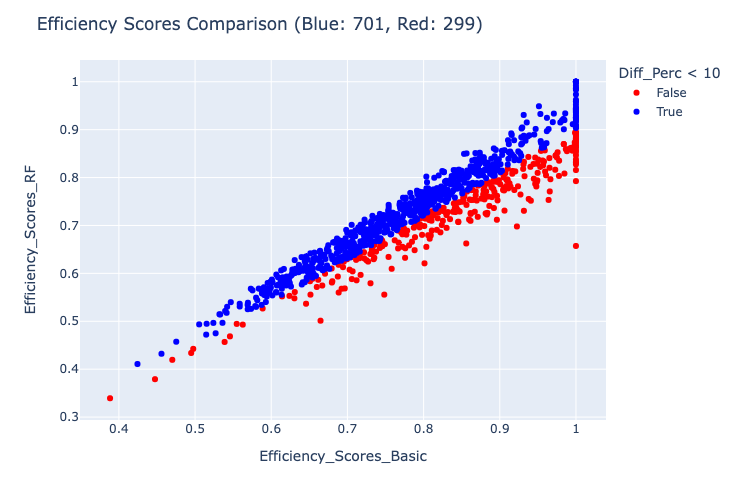

In [62]:
fig = px.scatter(res_rf, x="Efficiency_Scores_Basic", y="Efficiency_Scores_RF", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_RF", "Diff_Perc"] + [res_rf.index])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### GradientBoostingRegressor

In [63]:
df_gb = pd.read_excel("US15I1O_gradientboostingregressor_Solution.xlsx", index_col=0)
df_gb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.851845,0.000197,0.000197,0.000000,0.000197,0.000197,0.000000,0.000000,0.000197,0.000197,0.000197,0.000197,0.000815,0.000000,0.000815,0.000197,0.001409
DMU 0002,0.720842,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000215,0.000044,0.000215,0.000624,0.000624,0.000044,0.000624,0.000044,0.001311
DMU 0003,0.711611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000618,0.000000,0.000000,0.000618,0.001261,0.000000,0.001261,0.000000,0.001898
DMU 0004,0.553956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000859,0.000859,0.000000,0.000859,0.000000,0.001794
DMU 0005,0.720618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000721,0.000000,0.000000,0.000721,0.000721,0.000000,0.000721,0.000000,0.001505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.687572,0.000213,0.000213,0.000000,0.000000,0.000213,0.000000,0.000000,0.000213,0.000213,0.000213,0.000213,0.001066,0.000000,0.001066,0.000000,0.001582
DMU 0997,0.797473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000722,0.000000,0.000000,0.000722,0.000722,0.000000,0.000722,0.000000,0.001508
DMU 0998,0.707104,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000050,0.000339,0.000050,0.000050,0.000772,0.000772,0.000050,0.000772,0.000050,0.001577
DMU 0999,0.712811,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000317,0.000047,0.000047,0.000721,0.000721,0.000047,0.000721,0.000047,0.001473


In [64]:
print((df_gb==0).sum())
print("Total : ", (df_gb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      507
Weight_Input 02      486
Weight_Input 03      782
Weight_Input 04      770
Weight_Input 05      492
Weight_Input 06      774
Weight_Input 07      780
Weight_Input 08       32
Weight_Input 09      481
Weight_Input 10      372
Weight_Input 11       26
Weight_Input 12        0
Weight_Input 13      771
Weight_Input 14        0
Weight_Input 15      770
Weight_Output 01       0
dtype: int64
Total :  7043


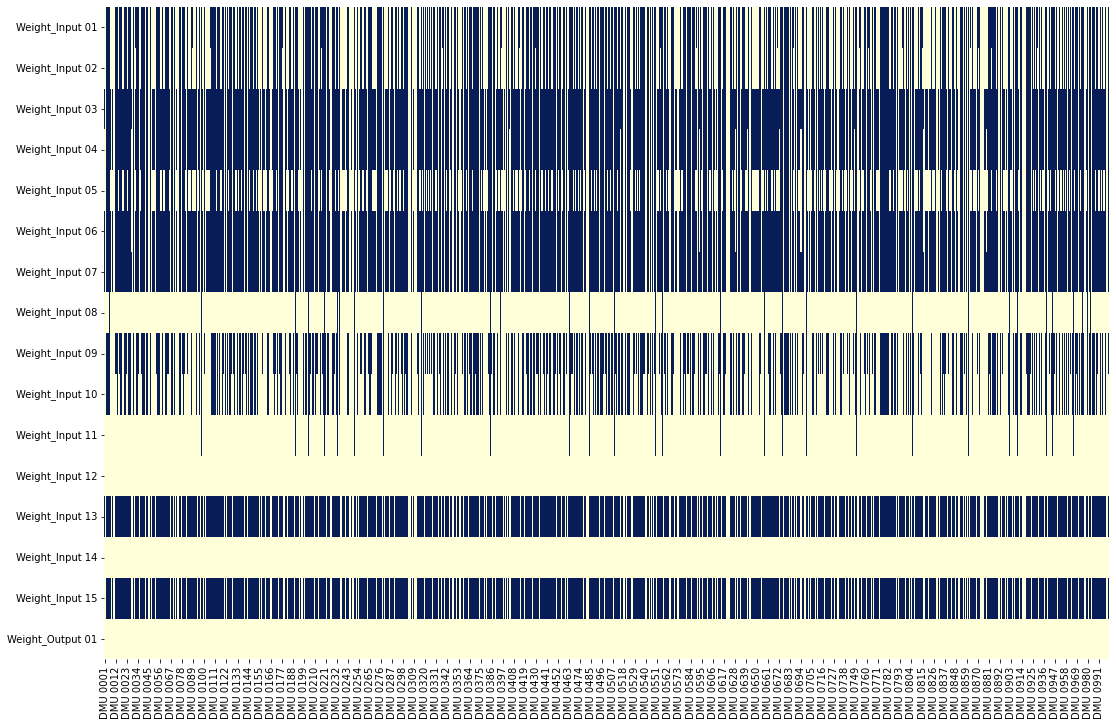

In [65]:
plt.figure(figsize=(18,12))
sns.heatmap(df_gb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [66]:
res_gb = pd.DataFrame()
res_gb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_gb["Efficiency_Scores_GB"] = df_gb["Efficiency_Scores"]
res_gb["Diff"] = res_gb["Efficiency_Scores_Basic"]  - res_gb["Efficiency_Scores_GB"]
res_gb["Diff_Perc"] = (res_gb["Diff"] / res_gb["Efficiency_Scores_Basic"]) * 100 
res_gb["Diff_Perc < 10"] = np.abs(res_gb["Diff_Perc"]) < 10  
res_gb = res_gb.round(4)
res_gb


,Efficiency_Scores_Basic,Efficiency_Scores_GB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,1.0000,0.8518,0.1482,14.8155,False
DMU 0002,0.8128,0.7208,0.0920,11.3190,False
DMU 0003,0.8074,0.7116,0.0958,11.8619,False
DMU 0004,0.6015,0.5540,0.0475,7.9040,True
DMU 0005,0.7839,0.7206,0.0633,8.0743,True
...,...,...,...,...,...
DMU 0996,0.7295,0.6876,0.0420,5.7532,True
DMU 0997,0.9447,0.7975,0.1472,15.5821,False
DMU 0998,0.7838,0.7071,0.0767,9.7809,True
DMU 0999,0.7588,0.7128,0.0460,6.0638,True


In [67]:
mitosheet.sheet(res_gb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-af87571b-1c5b-48a3-94d2-3ec9da587373", "code": {"imports…

In [68]:
blue = res_gb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_gb["Diff_Perc < 10"]) - (res_gb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  742
red :  258


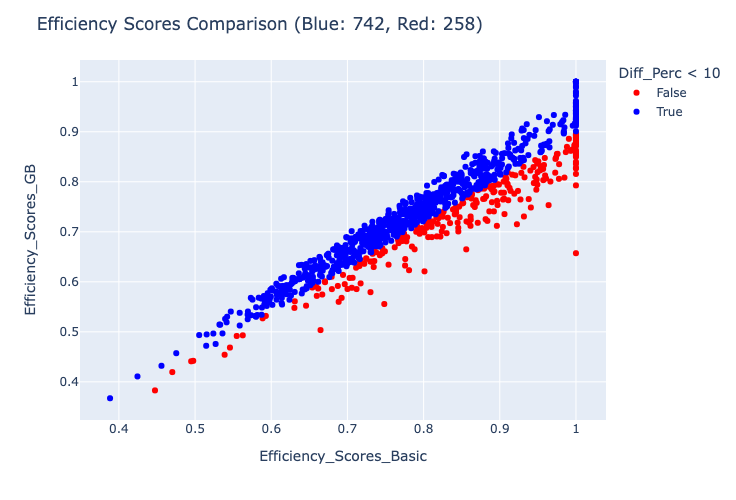

In [69]:
fig = px.scatter(res_gb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_GB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_GB", "Diff_Perc"] + [res_gb.index])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()

### XGBRegressor

In [70]:
df_xgb = pd.read_excel("US15I1O_xgbregressor_Solution.xlsx", index_col=0)
df_xgb

,Efficiency_Scores,Weight_Input 01,Weight_Input 02,Weight_Input 03,Weight_Input 04,Weight_Input 05,Weight_Input 06,Weight_Input 07,Weight_Input 08,Weight_Input 09,Weight_Input 10,Weight_Input 11,Weight_Input 12,Weight_Input 13,Weight_Input 14,Weight_Input 15,Weight_Output 01
DMU 0001,0.846376,0.000000,0.000051,0.000000,0.000051,0.000051,0.000051,0.0,0.000559,0.000559,0.000051,0.000559,0.000559,0.000051,0.000559,0.000051,0.001400
DMU 0002,0.694973,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.0,0.000435,0.000435,0.000435,0.000435,0.000435,0.000044,0.000435,0.000044,0.001264
DMU 0003,0.661477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000755,0.000755,0.000000,0.000755,0.000755,0.000000,0.000755,0.000000,0.001764
DMU 0004,0.531592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000660,0.000660,0.000000,0.000847,0.000660,0.000000,0.000847,0.000000,0.001721
DMU 0005,0.697069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000623,0.000623,0.000000,0.000623,0.000623,0.000000,0.000623,0.000000,0.001456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DMU 0996,0.654870,0.000000,0.000000,0.000000,0.000000,0.000336,0.000000,0.0,0.000516,0.000516,0.000516,0.000516,0.000516,0.000000,0.000516,0.000000,0.001507
DMU 0997,0.770982,0.000021,0.000021,0.000021,0.000021,0.000021,0.000021,0.0,0.000599,0.000599,0.000021,0.000599,0.000599,0.000021,0.000599,0.000021,0.001458
DMU 0998,0.700040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000534,0.000702,0.000000,0.000702,0.000702,0.000000,0.000704,0.000000,0.001561
DMU 0999,0.682392,0.000000,0.000000,0.000000,0.000000,0.000315,0.000000,0.0,0.000483,0.000483,0.000483,0.000483,0.000483,0.000000,0.000483,0.000000,0.001411


In [71]:
print((df_xgb==0).sum())
print("Total : ", (df_xgb==0).sum().sum())

Efficiency_Scores      0
Weight_Input 01      738
Weight_Input 02      668
Weight_Input 03      671
Weight_Input 04      657
Weight_Input 05      510
Weight_Input 06      664
Weight_Input 07      883
Weight_Input 08        9
Weight_Input 09        2
Weight_Input 10      420
Weight_Input 11        1
Weight_Input 12        6
Weight_Input 13      662
Weight_Input 14        0
Weight_Input 15      669
Weight_Output 01       0
dtype: int64
Total :  6560


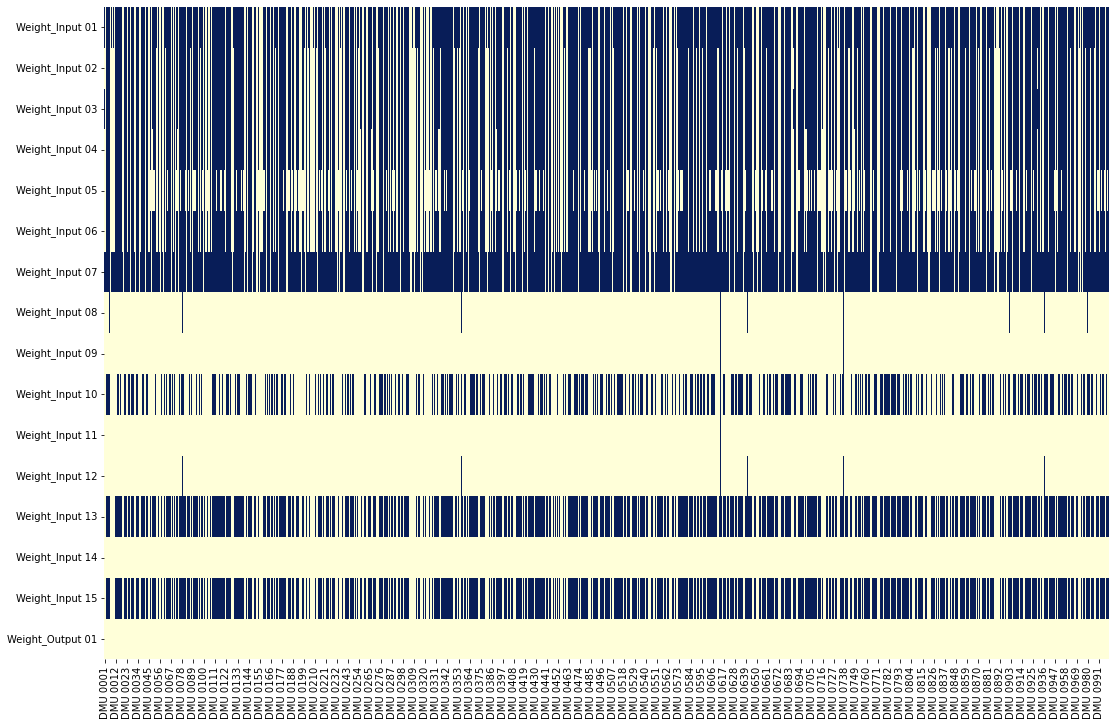

In [72]:
plt.figure(figsize=(18,12))
sns.heatmap(df_xgb.iloc[:,1:].eq(0).transpose(),
            cmap="YlGnBu",
            cbar=False,
            cbar_kws={'label': 'Zero Values'});

In [73]:
res_xgb = pd.DataFrame()
res_xgb["Efficiency_Scores_Basic"] = df_sol["Efficiency_Scores"]
res_xgb["Efficiency_Scores_XGB"] = df_xgb["Efficiency_Scores"]
res_xgb["Diff"] = res_xgb["Efficiency_Scores_Basic"]  - res_xgb["Efficiency_Scores_XGB"]
res_xgb["Diff_Perc"] = (res_xgb["Diff"] / res_xgb["Efficiency_Scores_Basic"]) * 100 
res_xgb["Diff_Perc < 10"] = np.abs(res_xgb["Diff_Perc"]) < 10  
res_xgb = res_xgb.round(4)
res_xgb


,Efficiency_Scores_Basic,Efficiency_Scores_XGB,Diff,Diff_Perc,Diff_Perc < 10
DMU 0001,1.0000,0.8464,0.1536,15.3624,False
DMU 0002,0.8128,0.6950,0.1179,14.5015,False
DMU 0003,0.8074,0.6615,0.1459,18.0713,False
DMU 0004,0.6015,0.5316,0.0699,11.6220,False
DMU 0005,0.7839,0.6971,0.0868,11.0783,False
...,...,...,...,...,...
DMU 0996,0.7295,0.6549,0.0747,10.2358,False
DMU 0997,0.9447,0.7710,0.1737,18.3863,False
DMU 0998,0.7838,0.7000,0.0837,10.6822,False
DMU 0999,0.7588,0.6824,0.0764,10.0724,False


In [74]:
mitosheet.sheet(res_xgb, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-ee90b142-c0d6-4682-8991-0f46f3bc3224", "code": {"imports…

In [75]:
blue = res_xgb["Diff_Perc < 10"].sum()
print("blue : ", blue)
red = len(res_xgb["Diff_Perc < 10"]) - (res_xgb["Diff_Perc < 10"].sum())
print("red : ", red)

blue :  537
red :  463


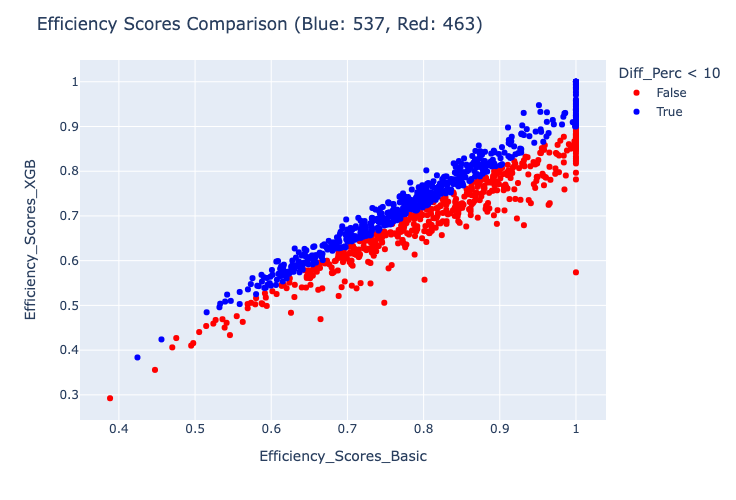

In [76]:
fig = px.scatter(res_xgb, x="Efficiency_Scores_Basic", y="Efficiency_Scores_XGB", color = "Diff_Perc < 10", color_discrete_map= {True:"blue", False: "red"},
                 hover_data=["Efficiency_Scores_Basic", "Efficiency_Scores_XGB", "Diff_Perc"] + [res_xgb.index])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Efficiency Scores Comparison (Blue: {blue}, Red: {red})",
)

fig.show()